In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import lightkurve as lk
from scipy import *
from astropy import constants as ac
from astropy import units as u

In [2]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True
plt.rcParams['axes.linewidth']=1.5

In [3]:
ac.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

$H_{tidal}$ represents the amount of heat imparted to the planet by tidal sources. It is well represented by the energy dissipation ($\dot{E}$) and can be approximated as:

$H_{tidal} \approx \dot{E}$ = $\frac{21}{2}$$\frac{k_2 \omega^5 R_p^5 e^2}{GQ}$ where

k2 = degree 2 love number; describes how a planet responds to the tide raised on it by its primary (0=rigid, 1.5= fluid); typically assumed to be 0.3 for studies of terrestrial and icy worlds

$\omega$ = orbital period

Rp = planet radius

e = orbital eccentricity

G = gravitational constant

Q = quality factor (fraction of energy that is dissipated as heat in the interiors of planets); assumed to be 100 for tidal dissipation studies of moons in our SS

In [58]:
ac.G #

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [66]:
((1.11**5)*ac.R_earth)

<Quantity 10747469.41904332 m>

In [123]:
def h_tidal(p,r,e):
    k2 = 0.3  #(0=rigid, 1.5= fluid); typically assumed to be 0.3 for studies of terrestrial and icy worlds
    omega = (2*np.pi) / p
    Q = 100. #assumed to be 100 for tidal dissipation studies of moons in our SS
    h_tidal = (21/2) * ((k2 * omega**5 * ((r**5)*ac.R_earth) * e**2)/(ac.G * Q))
    return h_tidal

$H_{Radiogenic}$ is the total radiogenic heating rate of each planet. It depends on the mass of the planet mantle, which depnds on the volume of the mantle, and h.

$H_{Radiogenic} = \dot{h}M_{mantle}$ where:

$M_{mantle} = 0.84 * \frac{4}{3} \pi R_p^3 \rho_{mantle}$ and

$V_{mantle} = 0.84V_p = 0.84 * \frac{4}{3} \pi R_p^3 $

In [91]:
def Mantle(r,m):
    volume = 0.84 * (4/3) * np.pi * (r*ac.R_earth)**3
    rho = m*ac.M_earth / volume
    Mantle = 0.84 * (4/3) * np.pi * (r*ac.R_earth)**3 * rho
    return Mantle

In [182]:
def Mantle_Europa(r,m):
    Eu_volume = 0.69 * (4/3) * np.pi * (r*ac.R_earth)**3
    Eu_rho = m*ac.M_earth / Eu_volume
    Europa_Mantle = 0.69 * (4/3) * np.pi * (r*ac.R_earth)**3 * Eu_rho
    return Europa_Mantle

In [180]:
def Mantle_Ganymede(r,m):
    G_volume = 0.4 * (4/3) * np.pi * (r*ac.R_earth)**3
    G_rho = m*ac.M_earth / G_volume
    Ganymede_Mantle = 0.4 * (4/3) * np.pi * (r*ac.R_earth)**3 * G_rho
    return Ganymede_Mantle

In [96]:
def h_radio(Mantle):
    h = 1.59 * 10** -11 *u.W*u.kg**-1 
    h_radio = h * Mantle
    return h_radio

In [132]:
h = 1.59 * 10** -11 *u.W*u.kg**-1 
h

<Quantity 1.59e-11 W / kg>

In [8]:
def h_total(h_tidal,h_radio):
    total = h_tidal + h_radio
    return (total)

Importing in the relevant list of candidates and confirmed planets

In [21]:
candidates = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates_mri_list.csv')
confirmed = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/targets_masses.csv')

In [149]:
print(len(candidates))
print(len(confirmed))

47
14


In [130]:
confirmed

,Unnamed: 0,name,insol,period,rade,radj,discoverymethod,Status,eccen,masse_est,masse,hostname
0,0,Kepler-452 b,1.108504,384.843000,1.568324,0.139904,Kepler,Confirmed,0.000,3.082162,NaN,Kepler-452
1,1,Kepler-1649 c,0.942183,19.535270,1.069217,0.095381,Kepler,Confirmed,0.000,1.235315,NaN,Kepler-1649
2,2,Kepler-1544 b,0.774587,168.811174,1.722270,0.153637,Kepler,Confirmed,0.000,3.613241,NaN,Kepler-1544
3,3,Kepler-1410 b,1.060000,60.866168,1.780000,0.158787,Kepler,Confirmed,0.000,3.821265,NaN,Kepler-1410
4,4,Kepler-296 f,0.620000,63.336270,1.800000,0.160571,Kepler,Confirmed,0.330,3.894446,NaN,Kepler-296
5,5,Kepler-283 c,0.966398,92.743711,1.944526,0.173464,Kepler,Confirmed,0.000,4.440091,NaN,Kepler-283
6,6,Kepler-62 f,0.509360,267.291000,1.533375,0.136786,Kepler,Confirmed,0.000,2.966459,NaN,Kepler-62
7,7,Kepler-442 b,1.007496,112.305300,1.375733,0.122724,Kepler,Confirmed,0.040,2.467450,NaN,Kepler-442
8,8,Kepler-1652 b,0.810000,38.097220,1.600000,0.142730,Kepler,Confirmed,0.000,3.188594,NaN,Kepler-1652
9,10,Kepler-441 b,0.241811,207.248200,1.568436,0.139914,Kepler,Confirmed,0.100,3.082536,NaN,Kepler-441


In [25]:
period_conf = confirmed['period'].values      #[days]
radius_conf = confirmed['rade'].values        #[Earth radii]
mass_conf = confirmed['masse_est'].values     #[Earth mass, estimate using m/r relationship]
eccen_conf = confirmed['eccen'].values        #eccentricity

In [126]:
#for T-1g  (p,r,e)
h_tidal(12.35,1.11,.026) #lynnae gets 5.77*10^11

<Quantity 1.16875181e+11 kg s2 / m2>

In [153]:
Mantle(1.11,1.34)

<Quantity 8.00270494e+24 kg>

In [129]:
h_radio(8.0027**24*u.kg) #lynae gets 2.57*10^13

<Quantity 7.56961871e+10 W>

In [133]:
h_total(1.1687518*10**11,7.5696187*10**10)

192571367000.0

In [134]:
print(confirmed['name'][4])

Kepler-296 f


Calculating heating rates for the planets with eccentricities

Kepler-296 f

In [135]:
h_tidal(period_conf[4],radius_conf[4],eccen_conf[4])

<Quantity 5.95145953e+10 kg s2 / m2>

In [136]:
h_radio(Mantle(radius_conf[4],mass_conf[4])) #r,m

<Quantity 3.6980673e+14 W>

In [183]:
h_radio(Mantle_Europa(radius_conf[4],mass_conf[4])) #r,m

<Quantity 3.6980673e+14 W>

In [184]:
h_radio(Mantle_Ganymede(radius_conf[4],mass_conf[4])) #r,m

<Quantity 3.6980673e+14 W>

Kepler-442 b

In [137]:
print(confirmed['name'][7])

Kepler-442 b


In [140]:
h_tidal(period_conf[7],radius_conf[7],eccen_conf[7])

<Quantity 13010246.2689677 kg s2 / m2>

In [139]:
h_radio(Mantle(radius_conf[7],mass_conf[7])) #r,m

<Quantity 2.34302785e+14 W>

In [185]:
h_radio(Mantle_Europa(radius_conf[7],mass_conf[7])) #r,m

<Quantity 2.34302785e+14 W>

In [186]:
h_radio(Mantle_Ganymede(radius_conf[7],mass_conf[7])) #r,m

<Quantity 2.34302785e+14 W>

In [141]:
print(confirmed['name'][9])

Kepler-441 b


In [144]:
(h_tidal(period_conf[9],radius_conf[9],eccen_conf[9]))

<Quantity 7317726.49892201 kg s2 / m2>

In [145]:
(h_radio(Mantle(radius_conf[9],mass_conf[9])))

<Quantity 2.92709815e+14 W>

In [189]:
h_radio(Mantle_Europa(radius_conf[9],mass_conf[9])) #r,m

<Quantity 2.92709815e+14 W>

In [188]:
h_radio(Mantle_Ganymede(radius_conf[9],mass_conf[9])) #r,m

<Quantity 2.92709815e+14 W>

In [146]:
#toi-700 d
print(confirmed['name'][13])

TOI-700 d


In [147]:
(h_tidal(period_conf[13],radius_conf[13],eccen_conf[13]))

<Quantity 9.69342013e+09 kg s2 / m2>

In [148]:
(h_radio(Mantle(radius_conf[13],mass_conf[13])))

<Quantity 1.4946516e+14 W>

In [190]:
h_radio(Mantle_Ganymede(radius_conf[13],mass_conf[13])) #r,m

<Quantity 1.4946516e+14 W>

In [191]:
h_radio(Mantle_Europa(radius_conf[13],mass_conf[13])) #r,m

<Quantity 1.4946516e+14 W>

## Calculating Heating Rates for Candidates 

Since we do not have any eccentricity values for candidates we will draw from a distribution of eccentricities based on the work by: https://arxiv.org/pdf/1807.00549.pdf (Table 3 -- half gaussian values for single planets)

In [155]:
#generating random eccentricities
from scipy.stats import halfnorm
e = halfnorm.rvs(size=50,scale=.32)

In [156]:
print(e)

[0.62013939 0.00671565 0.21470335 0.25484754 0.02436062 0.10618933
 0.03090688 0.26341431 0.24437037 0.28450081 0.03532547 0.14480737
 0.25237698 0.25333396 0.03293996 0.46025262 0.04123096 0.43928757
 0.0619904  0.34483032 0.21624888 0.24822681 0.47992728 0.02896983
 0.21070966 0.2148499  0.23126183 0.35057041 0.16632998 0.12026604
 0.18266845 0.04260514 0.3637169  0.18394073 0.51534321 0.16690191
 0.31585422 0.1328866  0.34988414 0.20543113 0.17496255 0.15235373
 0.35288333 0.09728527 0.20322862 0.09147583 0.01810485 0.0079794
 0.27385199 0.4093375 ]


In [152]:
.32+.06, .32-.06

(0.38, 0.26)

In [166]:
#es = np.linspace(halfnorm.ppf(0.26),
               # halfnorm.ppf(0.38), 100)
#plt.plot(es, halfnorm.pdf(es),
      # 'r-', lw=5, alpha=0.6, label='halfnorm pdf')

In [167]:
#rv = halfnorm()
#plt.plot(es, rv.pdf(es), 'k-', lw=2, label='frozen pdf')

In [168]:
#vals = halfnorm.ppf([0.001, 0.5, 0.999])
#np.allclose([0.001, 0.5, 0.999], halfnorm.cdf(vals))

(array([3.58642786, 1.30415559, 2.60831117, 2.93435007, 1.95623338,
        1.95623338, 0.3260389 , 0.97811669, 0.3260389 , 0.3260389 ]),
 array([0.00671565, 0.06805802, 0.1294004 , 0.19074277, 0.25208515,
        0.31342752, 0.37476989, 0.43611227, 0.49745464, 0.55879702,
        0.62013939]),
 [<matplotlib.patches.Polygon at 0x7fda73473210>])

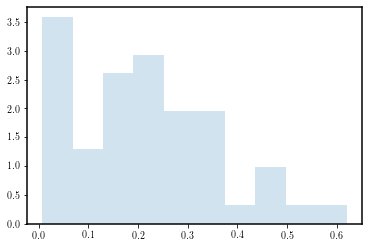

In [170]:
plt.hist(e, density=True, histtype='stepfilled', alpha=0.2)


#plt.plot(es, halfnorm.pdf(es),
#       'r-', lw=5, alpha=0.6, label='halfnorm pdf')
#plt.plot(es, rv.pdf(es), 'k-', lw=2, label='frozen pdf')

#plt.legend(loc='best', frameon=False)
#plt.show()